# kmodes
[kmodes doc](https://github.com/nicodv/kmodes)

In [21]:
# data
import pandas as pd
import numpy as np

# data visualization
import matplotlib.pyplot as plt

# machine learning
from kmodes.kmodes import KModes

# evaluation
from collections import Counter

## data

In [2]:
df = pd.read_csv('../data/combined_feng.csv', index_col=0)
df.shape

(3000, 7353)

In [3]:
# get data
X = df.drop(columns='female_led')
y = df['female_led']

In [4]:
y.value_counts()

0    2858
1     142
Name: female_led, dtype: int64

In [5]:
# only take X that belongs to the majority class
X = X[y==0]
X.shape

(2858, 7352)

# MAKE SURE TO SCALE DATA BEFORE CLUSTERING

## machine learning

In [6]:
# km = KModes(n_clusters=4, init='Huang', n_init=5, verbose=1)

In [8]:
km3 = KModes(n_clusters=3, init='Huang', verbose=1)

In [10]:
kmodes3 = km3.fit_predict(X)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 739, cost: 94653.0
Run 1, iteration: 2/100, moves: 151, cost: 94650.0
Run 1, iteration: 3/100, moves: 0, cost: 94650.0


In [35]:
X['kmodes3']=kmodes3

In [14]:
Counter(kmodes3)

Counter({2: 928, 0: 646, 1: 1284})

In kmodes, there does not exist the notion of an "optimal k", it really depends on the need of the cluster grouping. Also, usually you would initialize and run a few more times because each run creates a different clustering result. 

Currently, I realized that clustering 2858 into three groups, even if evenly divided, would still have around 950 entries per group. However, in order to really break down the classification imbalance, we would need the number of entries per group to be in comparable size as the minority group (n=142). 

Breaking it down into comparable size without creating too many clusters, **k=15** might be a number to try out first, expecting to have around 200 entries per class.

In [15]:
km15 = KModes(n_clusters=15, init='Huang', verbose=1)

In [16]:
kmodes15 = km15.fit_predict(X)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1360, cost: 88861.0
Run 1, iteration: 2/100, moves: 282, cost: 88799.0
Run 1, iteration: 3/100, moves: 32, cost: 88797.0
Run 1, iteration: 4/100, moves: 0, cost: 88797.0


In [ ]:
X['kmodes15']=kmodes15

In [17]:
Counter(kmodes15)

Counter({11: 69,
         2: 167,
         1: 111,
         8: 101,
         3: 79,
         6: 123,
         14: 94,
         9: 46,
         13: 329,
         7: 86,
         10: 112,
         0: 460,
         12: 467,
         4: 343,
         5: 271})

## data visualization

In [23]:
def scat(x_col='Trend Score (90 Days)', 
         y_col='last_funding_amount_usd', 
         c_col='kmodes'):
    plt.figure(figsize=(10,7))
    plt.scatter(x = X[x_col], y = X[y_col], c = X[c_col])
    plt.xlabel(x_col)
    plt.ylabel(y_col) 

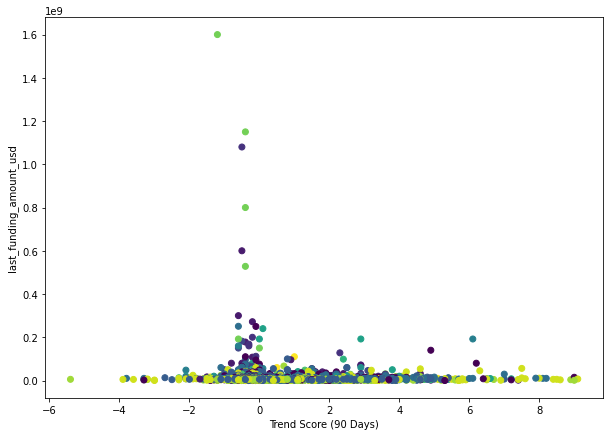

In [24]:
scat(c_col='kmodes15')

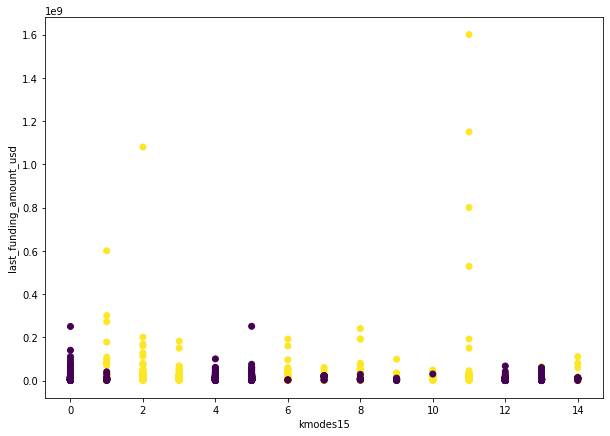

In [27]:
scat(x_col='kmodes15', c_col='Asia-Pacific (APAC)')

In [31]:
list(X.columns[7000:])

['Urbain Vandeurzen',
 'V Fund Management',
 'V-Capital',
 'VCapital',
 'VEB Ventures',
 'VI Partners',
 'VOC Capital Partners',
 'VP Capital',
 'VStar Capital',
 'Vaekstfonden',
 'Valar Ventures',
 'Valor Capital Venture Capital Fund Management Ltd.',
 'ValueStream Ventures',
 'Vast Ventures',
 'Vectr',
 'Velan Ventures',
 'Ventech',
 'Ventech China',
 'Venture Capital Partners',
 'Venture Kick',
 'VentureFriends',
 'Versant Ventures',
 'Vertex Ventures',
 'Vertical Venture Partners',
 'Vertical.vc',
 'Vertis SGR S.p.A.',
 'Verve Ventures',
 'Viking Global Investors',
 'Vincent Raya',
 'Virtual Eyes',
 'Vispiron',
 'Volcanics Venture',
 'Volition Capital',
 'Volkswagen Group',
 'Volta Ventures',
 'Vortex Capital Partners',
 'Vow',
 'Voyager Capital',
 'Wacai.com',
 'Wang Yongchao',
 'Wang Yu',
 'Wanxiang America',
 'Warburg Pincus',
 'Wavemaker Partners',
 'Wayra',
 'We Capital',
 'WeDoctor',
 'Wealth Club',
 'Weining Internet Technology',
 'Wellington Partners',
 'Wells Fargo',
 'Wer

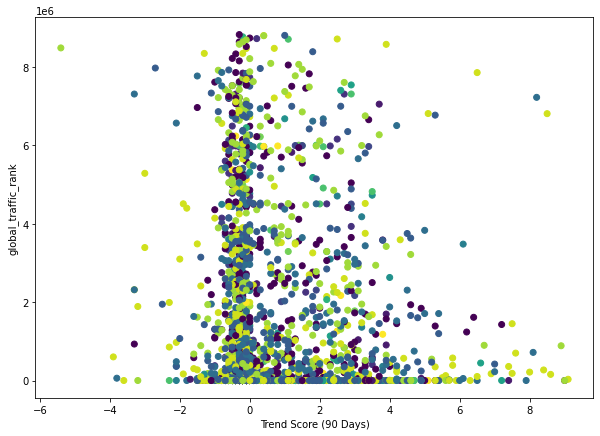

In [33]:
scat(y_col='global_traffic_rank', c_col='kmodes15')

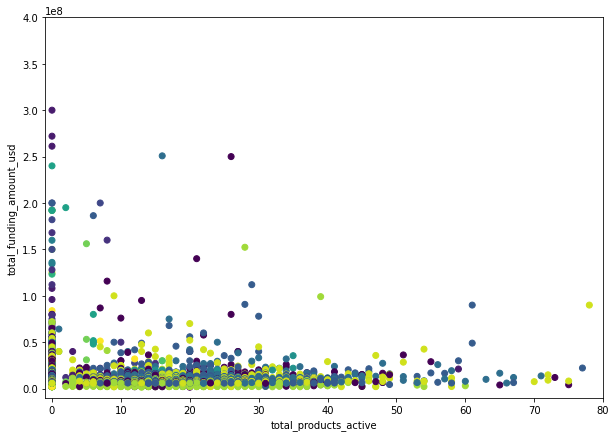

In [67]:
scat(x_col='total_products_active', 
     y_col='total_funding_amount_usd', 
     c_col='kmodes15')
plt.xlim(right=80, left=-1);
plt.ylim(top=0.4*1e9, bottom=-1e7);

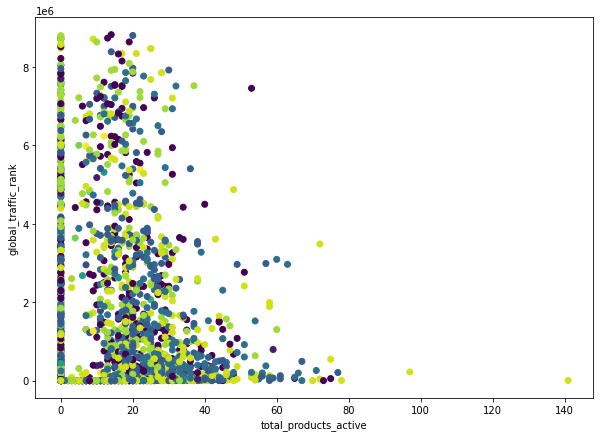

In [68]:
scat(x_col='total_products_active', y_col='global_traffic_rank', c_col='kmodes15')

In [ ]:
# clusters = km.fit_predict(data)
# km.cluster_centroids_